**Importing modules**


In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading json file from kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vikashrprajapati","key":"e18f6eb5eb11814f543bc808f7e0fed2"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

Loading Toronto Emotional speach data set from the kaggle

In [6]:
!kaggle datasets download -d 'ejlok1/toronto-emotional-speech-set-tess'

 99% 425M/428M [00:15<00:00, 29.8MB/s]
100% 428M/428M [00:15<00:00, 29.1MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/toronto-emotional-speech-set-tess.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [8]:
import os
# Define lists to store file paths and labels
# Define lists to store file paths and labels
paths = []
labels = []

# Iterate through the extracted files
for dirname, _, filenames in os.walk('/content/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
         break

Dataset is loaded

In [10]:
print(f"length of paths: {len(paths)} and length of labels: {len(labels)}")

length of paths: 2800 and length of labels: 2800


Creating DataFrame

In [11]:
df = pd.DataFrame()

In [12]:
df['Speach'] = paths
df['Label'] = labels

In [13]:
df.head()

,Speach,Label
0,/content/TESS Toronto emotional speech set dat...,neutral
1,/content/TESS Toronto emotional speech set dat...,neutral
2,/content/TESS Toronto emotional speech set dat...,neutral
3,/content/TESS Toronto emotional speech set dat...,neutral
4,/content/TESS Toronto emotional speech set dat...,neutral


In [14]:
df.Label.value_counts()

neutral    400
sad        400
happy      400
angry      400
ps         400
disgust    400
fear       400
Name: Label, dtype: int64

EDA

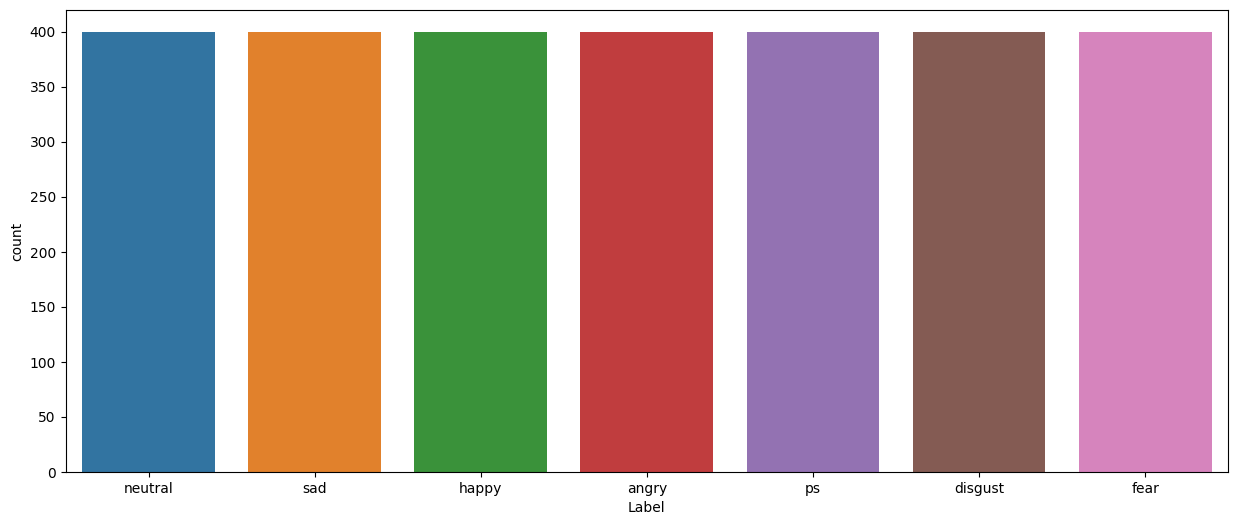

In [16]:
plt.figure(figsize = (15,6))
sns.countplot(x = df['Label'])
plt.show()

In [17]:
def waveshow(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

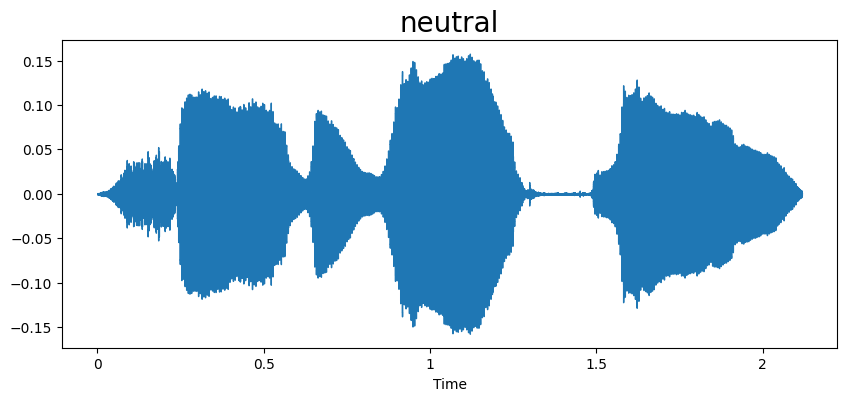

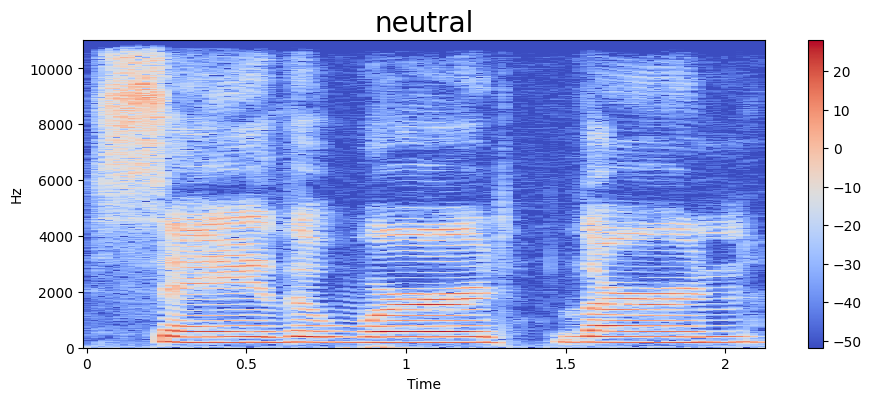

In [20]:
emotion = 'neutral'
path = np.array(df['Speach'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

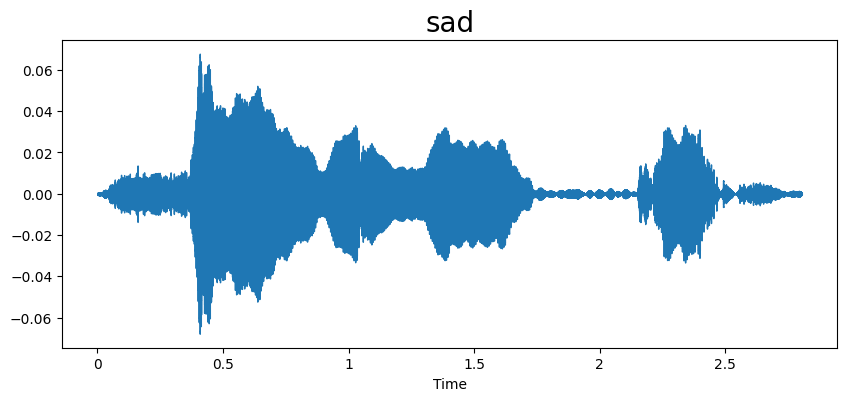

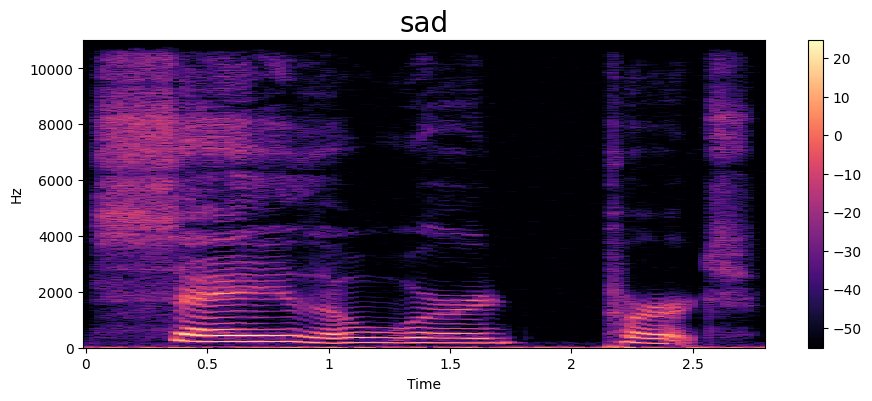

In [21]:
emotion = 'sad'
path = np.array(df['Speach'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

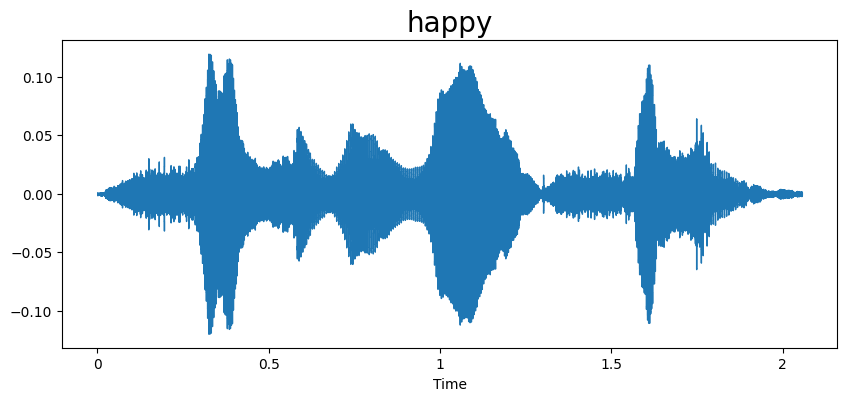

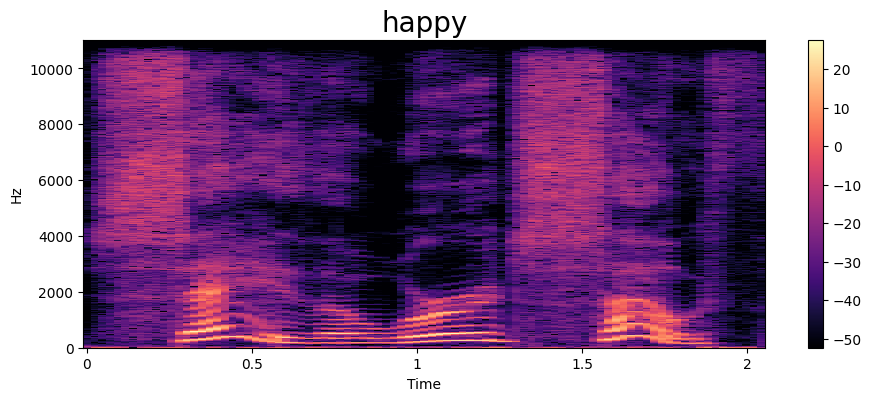

In [22]:
emotion = 'happy'
path = np.array(df['Speach'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

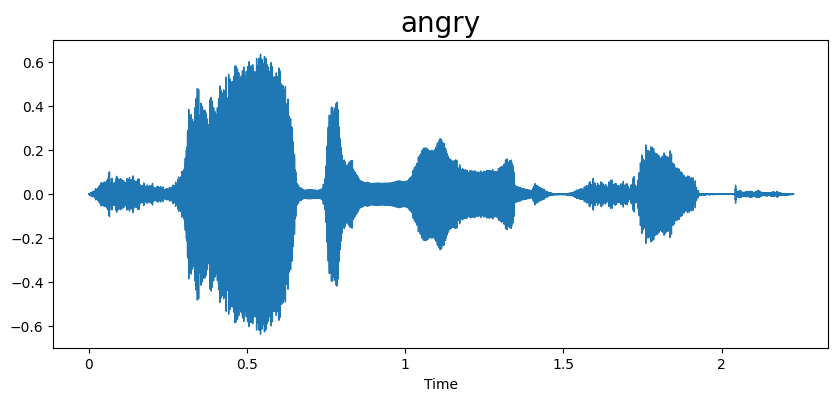

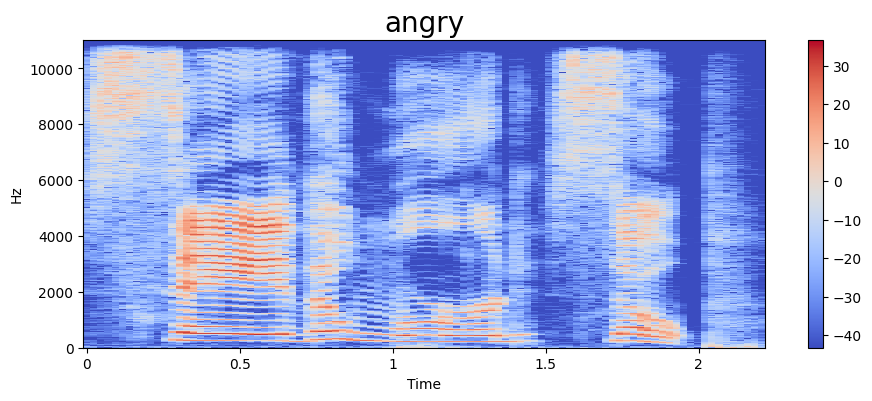

In [23]:
emotion = 'angry'
path = np.array(df['Speach'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

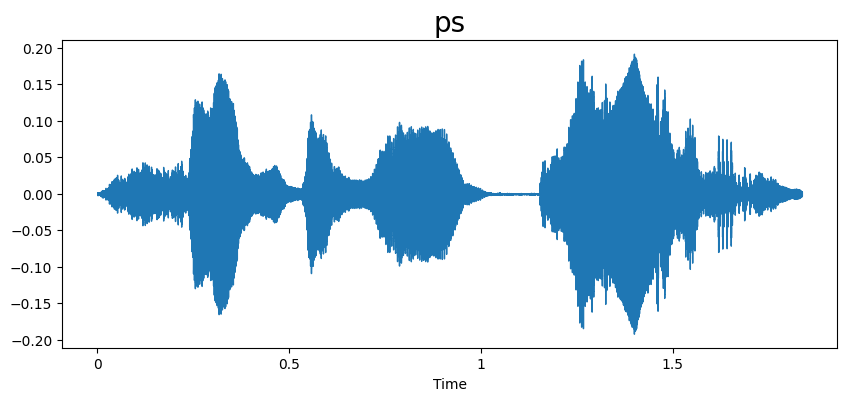

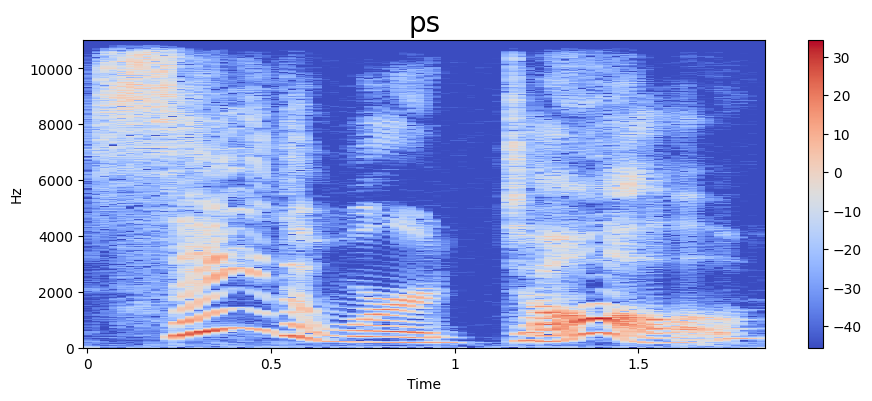

In [24]:
emotion = 'ps'
path = np.array(df['Speach'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

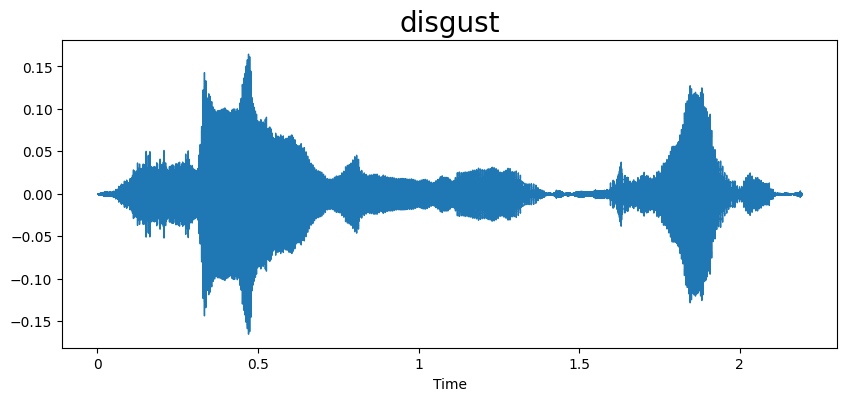

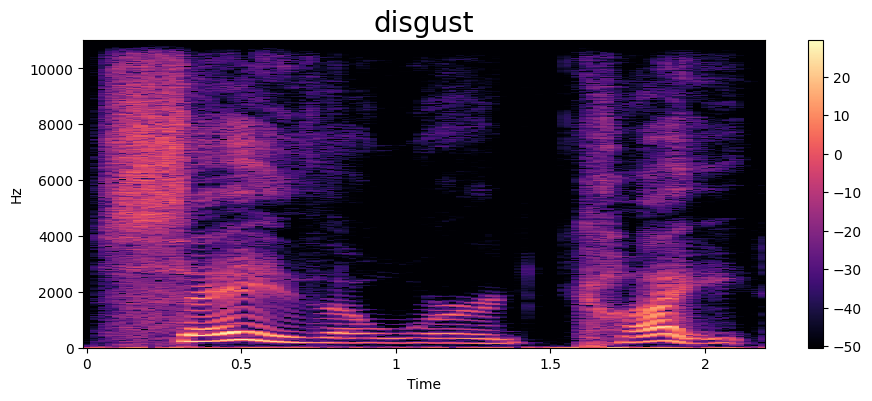

In [25]:
emotion = 'disgust'
path = np.array(df['Speach'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

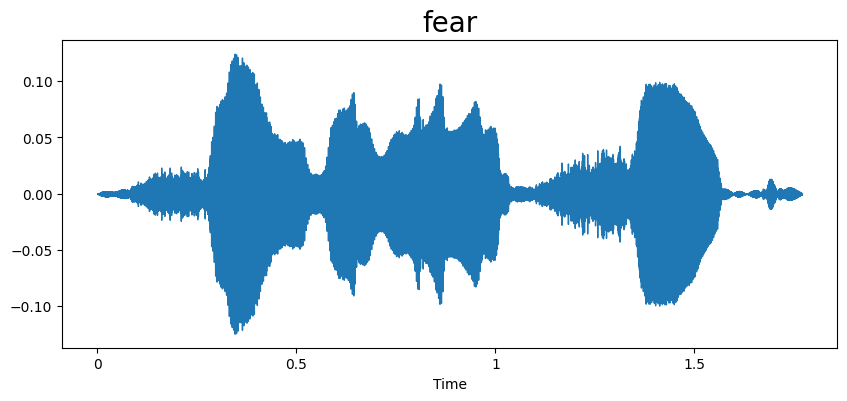

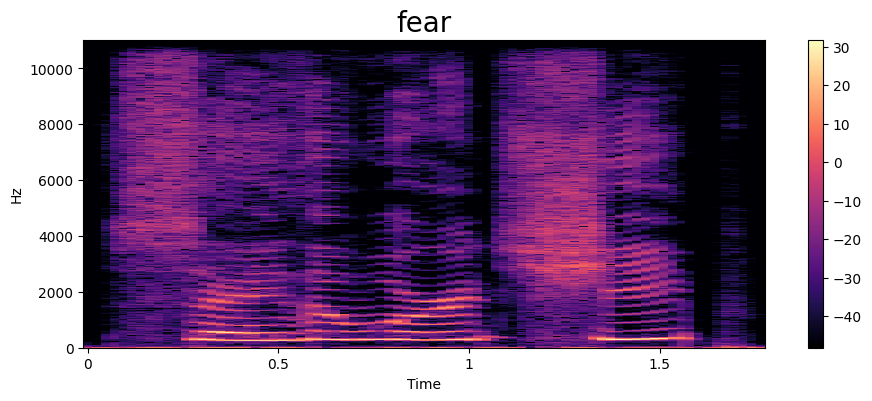

In [26]:
emotion = 'fear'
path = np.array(df['Speach'][df['Label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [27]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [29]:
extract_mfcc(df['Speach'][0])

array([-4.0274261e+02,  9.2841805e+01, -1.2852189e+01,  2.0528706e+01,
       -3.7236333e+00,  2.8646877e+00, -1.7273486e+00, -3.5460773e+01,
        9.0406364e-01,  8.6905880e+00, -2.2158489e+01,  9.6817522e+00,
       -7.4415107e+00,  3.5533085e+00,  4.0677576e+00, -1.1888583e+01,
        3.1364810e+00,  1.6654689e-02, -1.3703616e+01,  2.3107688e+00,
       -4.4321485e+00, -5.0083933e+00, -8.1102085e+00, -4.2511516e+00,
       -8.4428558e+00, -2.6280966e+00, -3.8329446e+00,  1.5621591e-01,
       -7.9401836e+00, -2.8657064e+00, -1.4534603e+01, -4.5679280e-01,
        1.4813377e-01,  2.2873085e+01,  3.4448952e+01,  4.0115273e+01,
        3.3497105e+01,  1.6874641e+01, -1.6170214e+00, -4.2804236e+00],
      dtype=float32)

In [31]:
X_mfcc = df['Speach'].apply(lambda x: extract_mfcc(x))

In [32]:
X_mfcc

0       [-402.7426, 92.841805, -12.852189, 20.528706, ...
1       [-449.2682, 80.92857, 13.570169, 39.60374, -2....
2       [-397.18878, 100.58832, -14.762504, 15.040794,...
3       [-410.1333, 107.65628, -3.8428857, 19.224184, ...
4       [-424.17807, 57.831955, 23.443544, 28.864218, ...
                              ...                        
2795    [-394.8999, 49.387234, -7.9844036, -2.3147316,...
2796    [-404.03497, 47.880775, -6.186285, -4.488095, ...
2797    [-399.3086, 80.32976, -0.8494892, -8.483726, -...
2798    [-416.0307, 49.287075, -1.7498764, -9.981473, ...
2799    [-399.07562, 104.1401, -1.9816839, -14.869879,...
Name: Speach, Length: 2800, dtype: object

In [33]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [34]:
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [35]:
from sklearn.preprocessing import OneHotEncoder
encoding = OneHotEncoder()
y = encoding.fit_transform(df[['Label']])

In [36]:
y = y.toarray()

In [37]:
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [38]:
y.shape

(2800, 7)

In [39]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [40]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 12s 181ms/step - loss: 1.2820 - accuracy: 0.5027 - val_loss: 0.9637 - val_accuracy: 0.6339
Epoch 2/50
35/35 [==============================] - 7s 201ms/step - loss: 0.4068 - accuracy: 0.8607 - val_loss: 1.3490 - val_accuracy: 0.5339
Epoch 3/50
35/35 [==============================] - 6s 165ms/step - loss: 0.2453 - accuracy: 0.9219 - val_loss: 1.5429 - val_accuracy: 0.5411
Epoch 4/50
35/35 [==============================] - 7s 200ms/step - loss: 0.1296 - accuracy: 0.9621 - val_loss: 1.8113 - val_accuracy: 0.5500
Epoch 5/50
35/35 [==============================] - 6s 170ms/step - loss: 0.1460 - accuracy: 0.9531 - val_loss: 1.8026 - val_accuracy: 0.5304
Epoch 6/50
35/35 [==============================] - 7s 206ms/step - loss: 0.1126 - accuracy: 0.9625 - val_loss: 1.9376 - val_accuracy: 0.5357
Epoch 7/50
35/35 [==============================] - 6s 171ms/step - loss: 0.1053 - accuracy: 0.9688 - val_loss: 3.4398 - val_accuracy: 0.3643
Epoch

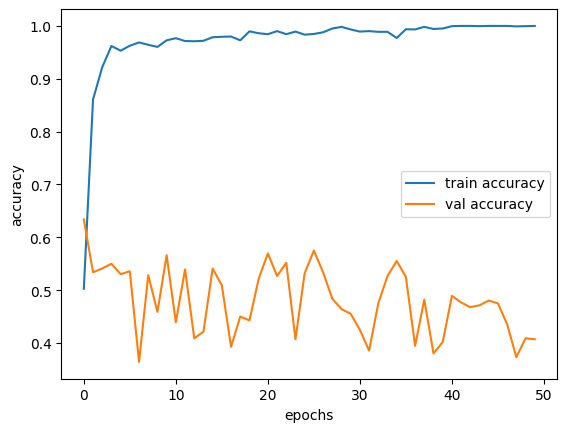

In [41]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

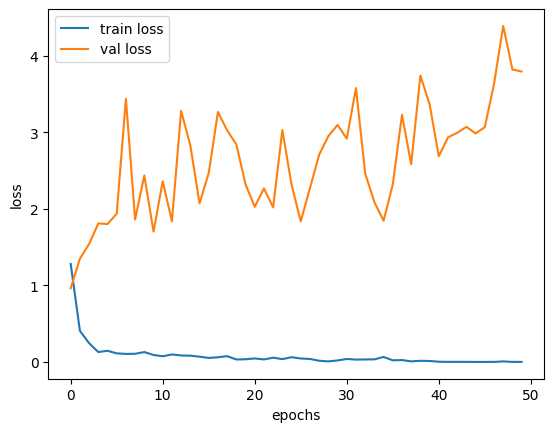

In [42]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()